<a href="https://colab.research.google.com/github/ArashVafa/ISTM660/blob/master/Clustering_Example_UCI%20Iris%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction:
Cluster analysis is a multivariate statistical technique that groups observations on the basis of features or variables they are described by.
Was that too boring ok let's try to understand this with an example.
In the example given below there two figure, one on the left side has three clusters and this is done on the basis of geographic proximity, the first cluster shows the countries in North America and the second and third cluster shows the countries in Europe and Australia respectively.
In the figure to the right, the clustering is done on the basis of the official language of the country.
In simple terms we can understand this as observations in a dataset is divided
into different groups and this is very useful.

K-Means Algorithm:

The algorithm is very simple given data we first initialize seeds randomly. Then we go on calculating the euclidean distance of every point with every seeds. The one with the minimum distance becomes the part of the given seed. After each and every data is covered we place the seeds into the centroid of the clusters formed. And now that centroid is the representative of that cluster.

When to use Cluster Analysis?
This is one of the decision we have to take while dealing with problems. Taking decision is not a tedious task as it solely depends upon the type of data we are using. If we are using a labeled data we can use classification technique whereas in case when the data is not labeled we can cluster the data based on certain feature and try to label it on our own.
So when we use cluster analysis we don’t have labels(ie..data is not labeled)
in the context of machine learning this is called as unsupervised learning.

Final Goal:
The goal of clustering is to maximize the similarity of observation within the cluster and maximize the dissimilarity between the clusters.
We will be achieving this goal very soon. Let’s dive into it.

In [0]:
from sklearn.cluster import KMeans


Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

In [43]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load data into a pandas dataframe
df = pd.read_csv(url)

# Print first 5 rows of the dataframe
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [67]:
iris = pd.read_csv(url, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
print(iris.head())

# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test = train_test_split(iris, test_size=0.1) # 90% training and 10% test

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [0]:
X_train

Text(0, 0.5, 'sepal_width')

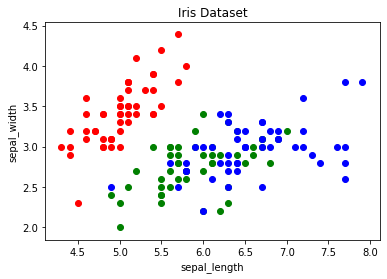

In [45]:
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['class'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

In [76]:
iris2 = iris.drop(['class'], axis = 1)
x = iris2.copy()

kmeans = KMeans(3)

kmeans.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
iris3 = iris
iris3['predict'] = kmeans.fit_predict(x)

In [98]:
iris3.tail(90)

,sepal_length,sepal_width,petal_length,petal_width,class,predict
60,5.0,2.0,3.5,1.0,Iris-versicolor,2
61,5.9,3.0,4.2,1.5,Iris-versicolor,2
62,6.0,2.2,4.0,1.0,Iris-versicolor,2
63,6.1,2.9,4.7,1.4,Iris-versicolor,0
64,5.6,2.9,3.6,1.3,Iris-versicolor,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


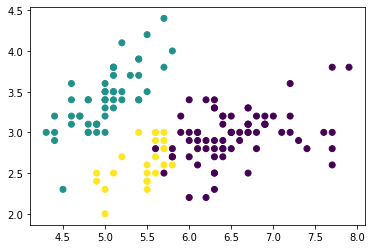

In [93]:
import matplotlib.pyplot as plt
plt.scatter(clusters['sepal_length'], clusters['sepal_width'],c=iris3['predict'])

Text(0, 0.5, 'sepal_width')

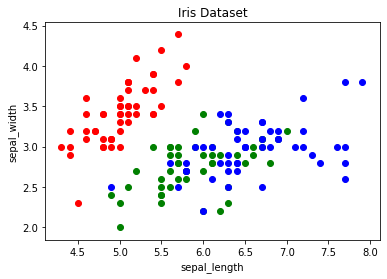

In [110]:
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['class'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

In [111]:
iris3['predictKMeans'] = iris3['predict']

for i in range(len(iris3['class'])):
    if iris3['class'][i] == 'Iris-virginica':
      iris3['predictKMeans'][i] = 0
    elif iris3['class'][i] == 'Iris-versicolor':
      iris3['predictKMeans'][i] = 2
    else:
      iris3['predictKMeans'][i] = 1 

iris3      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,sepal_length,sepal_width,petal_length,petal_width,class,predict,predict2,predictKMeans
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0,0,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0,0


In [117]:
error = 0
total = len(iris3['class'])
for i in range(len(iris3['class'])):
  if iris3['predictKMeans'][i] != iris3['predict'][i]:
    error += 1

accuracy = 100*((total-error)/total)
print('accuracy is', accuracy,'%')

accuracy is 84.0 %
